In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
from lightgbm import LGBMRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import BayesianRidge, ElasticNet, LinearRegression, SGDRegressor, LogisticRegression
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neural_network import MLPRegressor, MLPClassifier
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn import svm, preprocessing, datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
# Used for data storage and manipulation 
import numpy as np
from sklearn import linear_model, datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import sklearn.metrics as sm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from seaborn import pairplot

In [ ]:
import io
import os
import pandas as pd
pd.options.display.max_rows = 999


df = pd.read_csv("NBA20162021FinalTeamNameGone.csv")
train = df
x_train = train.drop(["W", "MOV"], axis = 1)
y_train = train["W"]
y_train=y_train.astype('int') 
testdf = pd.read_csv("NBA2022Final.csv")
#test = testdf.drop(["MP"], axis =1)
x_test = test.drop(["W", "Team"], axis =1)
y_test = test["W"]
y_test = y_test.astype('int')
train.head(180)
#train = train.drop(["G"], axis=1)
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)
print(train)
y_test

In [ ]:
corr = train.info()

In [ ]:
corr = train.corr()
Wcorr = corr["W"]
corr = train.corr()
Lcorr = corr["L"]
#corr.sort_values(by=['W'], inplace=True)
#corr.head(180)
#print(corr)
#Wcorr.sort_values(axis=0, ascending=False)
print(Wcorr)
print(Lcorr)
ix = train.corr().sort_values("W", ascending=False).index
#df_sorted = df.loc[:, ix]
print(ix)
#lx = (df.corr()).sort_values('A', ascending=False).index

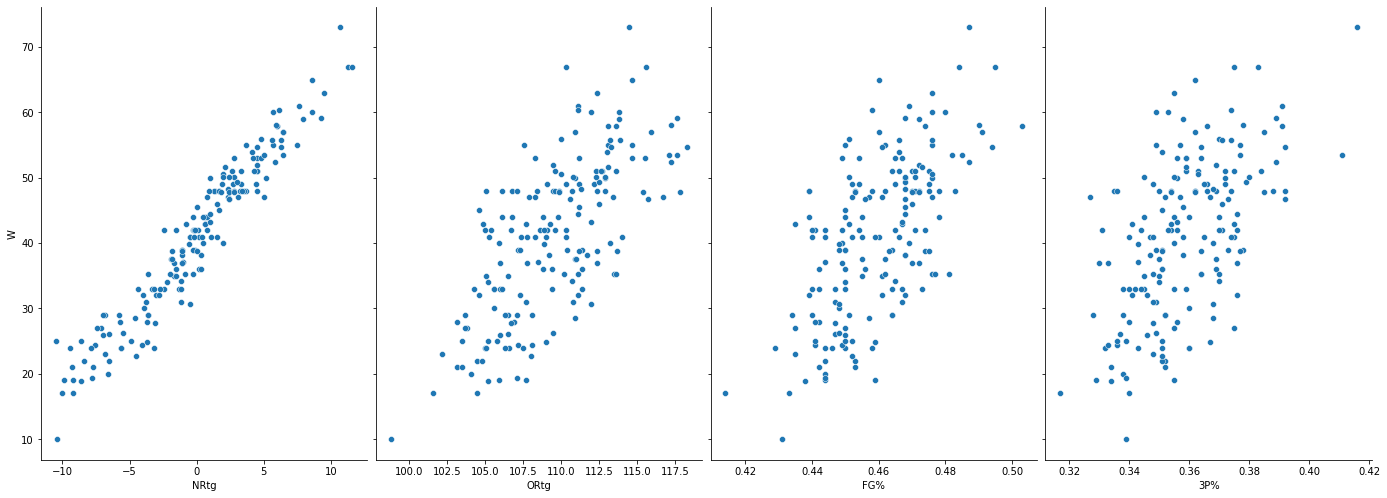

In [ ]:
#sns.pairplot(df, x_vars=['FG','3P', '2P','TRB','TOV','PTS','DefFG', 'Def3P', 'DefTRB', 'DefTOV', 'DefPTS'], y_vars='W', height=7,aspect=0.7)
sns.pairplot(train, x_vars=['NRtg','ORtg', 'FG%', '3P%'], y_vars = 'W', height = 7, aspect = 0.7)
#sns.regplot(x='NRtg', y= 'W', data = df)


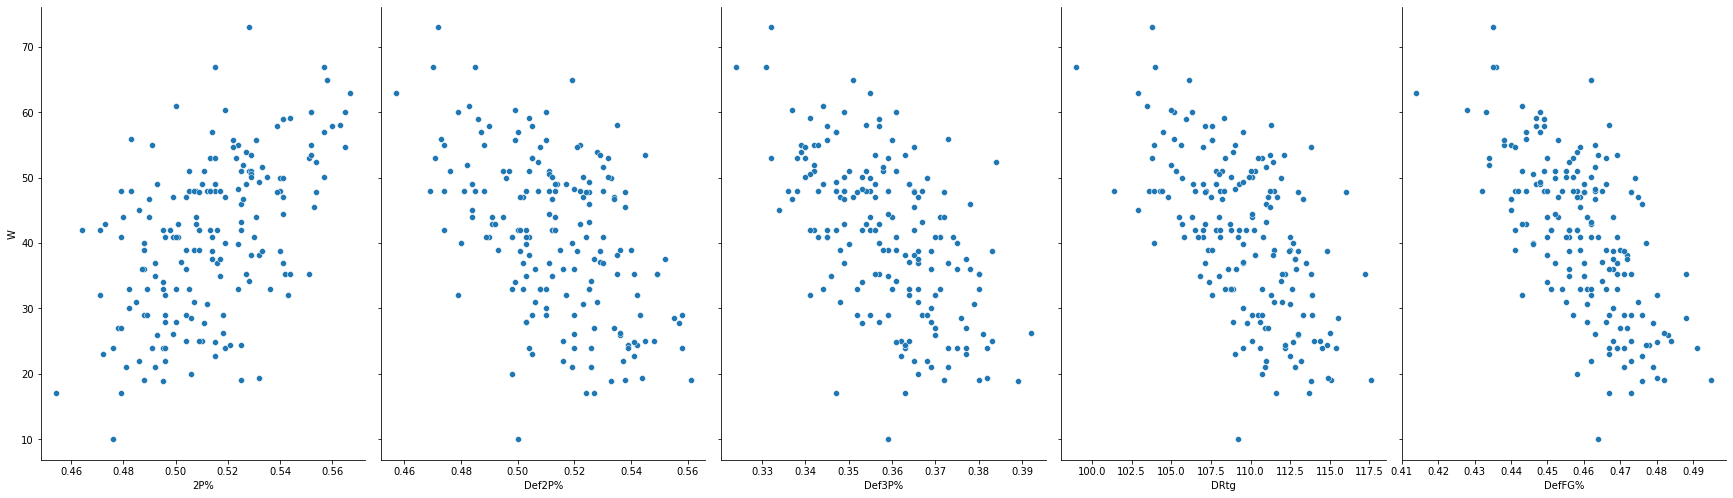

In [ ]:
sns.pairplot(train, x_vars=['2P%', 'Def2P%', 'Def3P%', 'DRtg', 'DefFG%'], y_vars = 'W', height = 7, aspect = 0.7)


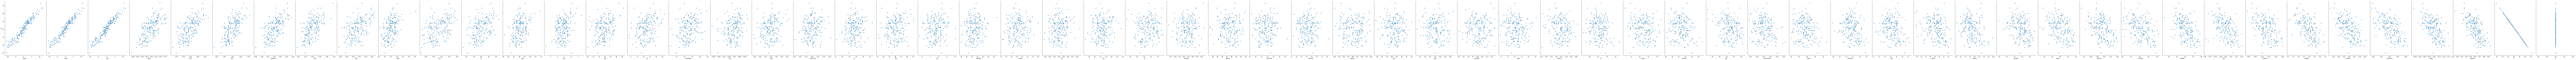

In [ ]:
g=sns.pairplot(train, x_vars=['NRtg', 'MOV', 'SRS', 'ORtg', 'TS%', 'FG%', 'OffeFG%', '3P%',
       '2P%', 'DRB', 'PTS', 'FG', 'TRB', 'BLK', 'AST', '3P', 'DefDRB%', 'FT%',
       '3PAr', 'OffFT/FGA', 'FT', '3PA', 'STL', 'OffORB%', 'DefPF', 'FTr',
       'FTA', '2P', 'Def2PA', 'DefFGA', 'DefTOV%', 'DefTOV', 'Def3PA', 'FGA',
       'Pace', 'DefORB', 'ORB', 'DefFT%', 'PF', 'Def3P', 'DefFTA', '2PA',
       'DefFT/FGA', 'DefFT', 'OffTOV%', 'TOV', 'Def2P', 'DefSTL', 'DefAST',
       'DefFG', 'DefPTS', 'DefTRB', 'DefDRB', 'SOS', 'Def2P%', 'DefBLK',
       'Def3P%', 'DefeFG%', 'DRtg', 'DefFG%', 'L', 'G'], y_vars = 'W', height = 7, aspect = 0.7, diag_kind ="kde")
g.map_lower(sns.kdeplot, levels = 4, color = ".2")

In [ ]:
X, y =train[['NRtg', 'MOV', 'SRS', 'ORtg', 'TS%', 'FG%', 'OffeFG%', '3P%',
       '2P%', 'DRB', 'PTS', 'FG', 'TRB', 'BLK', 'AST', '3P', 'DefDRB%', 'FT%',
       '3PAr', 'OffFT/FGA', 'FT', '3PA', 'STL', 'OffORB%', 'DefPF', 'FTr',
       'FTA', '2P', 'Def2PA', 'DefFGA', 'DefTOV%', 'DefTOV', 'Def3PA', 'FGA',
       'Pace', 'DefORB', 'ORB', 'DefFT%', 'PF', 'Def3P', 'DefFTA', '2PA',
       'DefFT/FGA', 'DefFT', 'OffTOV%', 'TOV', 'Def2P', 'DefSTL', 'DefAST',
       'DefFG', 'DefPTS', 'DefTRB', 'DefDRB', 'SOS', 'Def2P%', 'DefBLK',
       'Def3P%', 'DefeFG%', 'DRtg', 'DefFG%', 'L']], train["W"]

br = BayesianRidge()
en = ElasticNet()
gbr = GradientBoostingRegressor()
lgbm = LGBMRegressor()
lin = LinearRegression()
mlp = MLPRegressor(max_iter=1000)
sgd = SGDRegressor()
svr = SVR(kernel="linear")

br_scores = cross_val_score(br, X, y, cv=10)
en_scores = cross_val_score(en, X, y, cv=10)
gbr_scores = cross_val_score(gbr, X, y, cv=10)
lgbm_scores = cross_val_score(lgbm, X, y, cv=10)
lin_scores = cross_val_score(lin, X, y, cv=10)
mlp_scores = cross_val_score(mlp, X, y, cv=10)
sgd_scores = cross_val_score(sgd, X, y, cv=10)
svr_scores = cross_val_score(svr, X, y, cv=10)

print("BaynesianRidge:           ", br_scores.mean(), br_scores.std())
print("ElasticNet:               ", en_scores.mean(), en_scores.std())
print("GradientBoostingRegressor:", gbr_scores.mean(), gbr_scores.std())
print("LGBMRegressor:            ", lgbm_scores.mean(), lgbm_scores.std())
print("LinearRegression:         ", lin_scores.mean(), lin_scores.std())
print("MLPRegressor:             ", mlp_scores.mean(), mlp_scores.std())
print("SGDRegressor:             ", sgd_scores.mean(), sgd_scores.std())
print("SVR:                      ", svr_scores.mean(), svr_scores.std())

BaynesianRidge:            1.0 0.0
ElasticNet:                0.9999518293991366 2.25987586756598e-06
GradientBoostingRegressor: 0.9948333005275541 0.005502478509081268
LGBMRegressor:             0.9724776040174407 0.024152043924233025
LinearRegression:          1.0 0.0
MLPRegressor:              0.7138862533295224 0.44197373674342266
SGDRegressor:              -3.324314739550887e+25 4.415222347169962e+25
SVR:                       0.99997069582914 1.0057987099347045e-05


In [ ]:
scaler = StandardScaler()

# Standardize the dataset.
train_std = pd.DataFrame(scaler.fit_transform(train))
train_std.columns = train.columns

# Prepare the dataset for supervised learning.
X_std, y_std =train_std[['NRtg', 'MOV', 'SRS', 'ORtg', 'TS%', 'FG%', 'OffeFG%', '3P%',
       '2P%', 'DRB', 'PTS', 'FG', 'TRB', 'BLK', 'AST', '3P', 'DefDRB%', 'FT%',
       '3PAr', 'OffFT/FGA', 'FT', '3PA', 'STL', 'OffORB%', 'DefPF', 'FTr',
       'FTA', '2P', 'Def2PA', 'DefFGA', 'DefTOV%', 'DefTOV', 'Def3PA', 'FGA',
       'Pace', 'DefORB', 'ORB', 'DefFT%', 'PF', 'Def3P', 'DefFTA', '2PA',
       'DefFT/FGA', 'DefFT', 'OffTOV%', 'TOV', 'Def2P', 'DefSTL', 'DefAST',
       'DefFG', 'DefPTS', 'DefTRB', 'DefDRB', 'SOS', 'Def2P%', 'DefBLK',
       'Def3P%', 'DefeFG%', 'DRtg', 'DefFG%', 'L']], train["W"]

# Evaluate the models with cross validation.
br_std_scores = cross_val_score(br, X_std, y_std, cv=10)
en_std_scores = cross_val_score(en, X_std, y_std, cv=10)
gbr_std_scores = cross_val_score(gbr, X_std, y_std, cv=10)
lgbm_std_scores = cross_val_score(lgbm, X_std, y_std, cv=10)
lin_std_scores = cross_val_score(lin, X_std, y_std, cv=10)
mlp_std_scores = cross_val_score(mlp, X_std, y_std, cv=10)
sgd_std_scores = cross_val_score(sgd, X_std, y_std, cv=10)
svr_std_scores = cross_val_score(svr, X_std, y_std, cv=10)

print("BaynesianRidge:           ", br_scores.mean(), br_scores.std())
print("ElasticNet:               ", en_scores.mean(), en_scores.std())
print("GradientBoostingRegressor:", gbr_scores.mean(), gbr_scores.std())
print("LGBMRegressor:            ", lgbm_scores.mean(), lgbm_scores.std())
print("LinearRegression:         ", lin_scores.mean(), lin_scores.std())
print("MLPRegressor:             ", mlp_scores.mean(), mlp_scores.std())
print("SGDRegressor:             ", sgd_scores.mean(), sgd_scores.std())
print("SVR:                      ", svr_scores.mean(), svr_scores.std())

In [ ]:
train.shape

(180, 63)

In [ ]:
linereg = linear_model.LinearRegression()
linereg.fit(x_train, y_train)
Y_predict_linear_regression = linereg.predict(x_test)
Y_predict_linear_regression

In [ ]:
print("Mean absolute error =", round(sm.mean_absolute_error(y_test, Y_predict_linear_regression), 2)) 
print("R2 score =", round(sm.r2_score(y_test, Y_predict_linear_regression), 2))


In [ ]:
#train = train.drop(["G"], axis=1)
#scaler = StandardScaler()
#train = scaler.fit_transform(train)
#print(train)

In [ ]:
classify = MLPClassifier(solver='lbfgs', alpha = 1e-05, hidden_layer_sizes =(180,), random_state =1)
classify.fit(x_train,y_train)
classify.fit(x_test, y_test)
y_test.shape
x_test.shape
classifyWins = classify.predict(x_test)

In [ ]:
classifyWins

In [ ]:
order =[]
for i in range(30):
  print(testdf['Team'][i], classifyWins[i])
  order.append([testdf['Team'][i], classifyWins[i]])

In [ ]:
DT_model = DecisionTreeRegressor(max_depth=None).fit(x_train,y_train)
DT_predict = DT_model.predict(x_test) #Predictions on Testing data
DT_predict = DT_predict.round()
print(DT_predict)

[44. 51. 44. 43. 47. 45. 53. 49. 25. 53. 21. 28. 42. 33. 57. 55. 52. 47.
 37. 37. 25. 22. 51. 67. 29. 31. 35. 49. 50. 37.]


In [ ]:
order =[]
for i in range(30):
  print(testdf['Team'][i], DT_predict[i])
  order.append([testdf['Team'][i], DT_predict[i]])

In [ ]:
KNN_model = KNeighborsRegressor(n_neighbors=5).fit(x_train,y_train)
KNN_predict = KNN_model.predict(x_test) #Predictions on Testing data
KNN_predict = KNN_predict.round()
print(KNN_predict)

[43. 53. 47. 40. 48. 49. 48. 47. 22. 52. 23. 35. 42. 32. 50. 48. 47. 47.
 42. 39. 25. 23. 50. 54. 25. 31. 38. 47. 51. 41.]


In [ ]:
order =[]
for i in range(30):
  print(testdf['Team'][i], KNN_predict[i])
  order.append([testdf['Team'][i], KNN_predict[i]])